<a href="https://colab.research.google.com/github/Genome06/usa-house-pricing-regression/blob/main/Regression_House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA House Pricing Prediction Using Regression Model

## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
#!pip install category_encoders
#!pip install --upgrade xgboost
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb

In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Datasets

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Genome06/usa-house-pricing-regression/main/USA%20Housing%20Dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


## Check The null and Duplicates Data

In [6]:
#Check for null values ​​in datasets using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

Based on the data from `df.info()` we can see that there is no indication of empty or null data in this dataset. Based on `df.info()`, there are also several feature that i will do type casting on before entering the EDA (Exploratory Data Analysis) part, namely as follows:
<br>
1. `Date`: I will change the data type of this feature to Datetime or only Date to make it easier to carry out further analysis in the EDA stage, and also to make it easier to carry out feature extraction in the feature engineering stage if there are new features that can be created based on this feature.

In [7]:
#Check the duplicates data in datasets
print(f'Amount Of Duplicated Data in Datasets: {df.duplicated().sum()}')
print(f'Is There A Duplicate Data in Datasests: {df.duplicated().any()}')

Amount Of Duplicated Data in Datasets: 0
Is There A Duplicate Data in Datasests: False


Based on the data from `df.duplicated().sum()` and `df.duplicated.any()` we can see that there is no indication of duplicated data in this dataset.

## Exploratory Data Analysis

###Type Casting

In [8]:
#Check are all the value of date feature have value 00:00:00 inside it or there's another time info in there
#If yes, i will cast it to date and if not i will cast it to Datetime
#I'll do this to reduce noise in this feature
df['date'].value_counts()

,count
date,
2014-06-23 00:00:00,142
2014-06-25 00:00:00,131
2014-06-26 00:00:00,131
2014-07-08 00:00:00,127
2014-07-09 00:00:00,121
...,...
2014-05-02 00:00:00,3
2014-07-06 00:00:00,3
2014-05-11 00:00:00,2


In [9]:
#Because all the time info in date feature are the same which is 00:00:00
#I will cast it to date
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4140 non-null   datetime64[ns]
 1   price          4140 non-null   float64       
 2   bedrooms       4140 non-null   float64       
 3   bathrooms      4140 non-null   float64       
 4   sqft_living    4140 non-null   int64         
 5   sqft_lot       4140 non-null   int64         
 6   floors         4140 non-null   float64       
 7   waterfront     4140 non-null   int64         
 8   view           4140 non-null   int64         
 9   condition      4140 non-null   int64         
 10  sqft_above     4140 non-null   int64         
 11  sqft_basement  4140 non-null   int64         
 12  yr_built       4140 non-null   int64         
 13  yr_renovated   4140 non-null   int64         
 14  street         4140 non-null   object        
 15  city           4140 n

### Descriptive Statistic

In [11]:
nums =  df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns
cats =  df.select_dtypes(include=['object', 'category']).columns

In [12]:
#Numerical feature Descriptive statistic
df[nums].describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4140,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,2014-06-10 16:24:41.739130368,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-27 00:00:00,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-12 00:00:00,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,2014-06-25 00:00:00,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535


In [13]:
#Categorical feature Descriptive statistic
df[cats].describe()

,street,city,statezip,country
count,4140,4140,4140,4140
unique,4079,43,77,1
top,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,4,1415,128,4140


Based on the statistical data for the numerical and categorical features above, I have found several insights:

**Numerical** :
1. `sqft_lot` has a data distribution that tends to be positively skewed due to its mean being significantly larger than the median. However, this may require further examination in univariate analysis. This may also be due to the presence of outliers that push the mean upward.
2. `sqft_basement` has a data distribution that tends to be positively skewed due to its mean being significantly larger than the median. However, this may require further examination in univariate analysis. This may also be due to the presence of outliers that push the mean upward.
3. `yr_renovated` has a data distribution that tends to be positively skewed due to its mean being significantly larger than the median. However, this may require further examination in univariate analysis. This may also be due to the presence of outliers that push the mean value upwards.

**Categorical** :
1. `country` only has one value, namely `USA`. Therefore, I will probably not include this feature in this modeling as it seems to contain no important information.

### Univariate Analysis

#### Univariate Analysis For Numerical

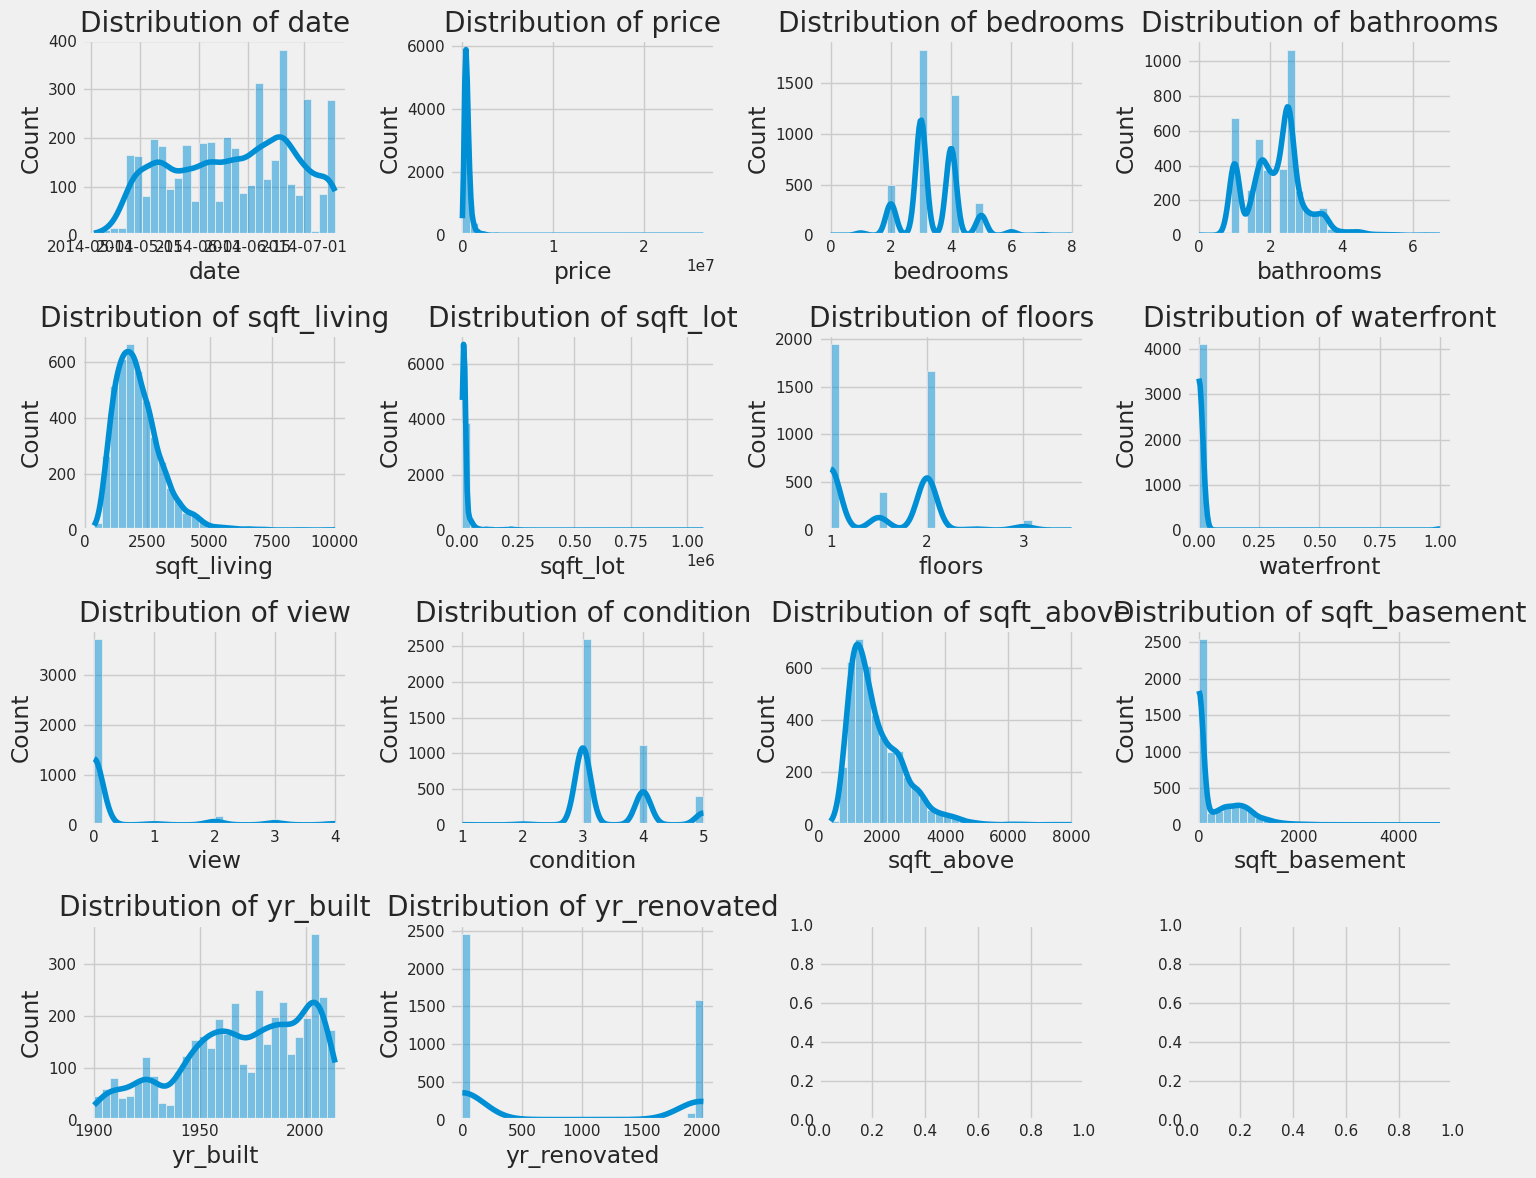

In [14]:
# Univariate Analysis for Numerical Features
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

for i, col in enumerate(nums):
    r, c = divmod(i, cols)
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[r][c])
    axes[r][c].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

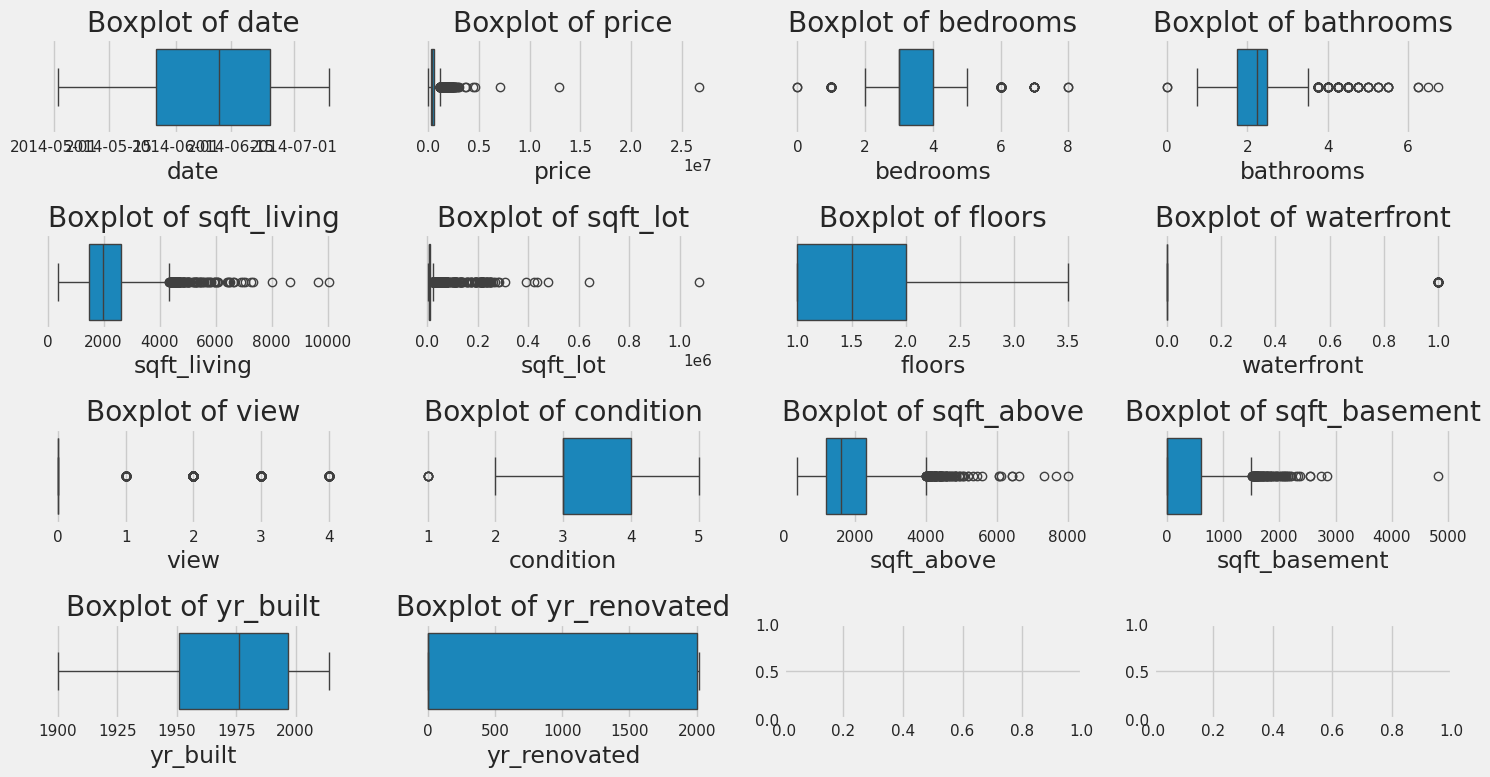

In [15]:
#Boxplot of numerical features to identify outliers
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

for i, col in enumerate(nums):
    r, c = divmod(i, cols)
    sns.boxplot(x=df[col].dropna(), ax=axes[r][c])
    axes[r][c].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Based on the histogram plot and boxplot above, I can conclude several things:
1. I will not perform any preprocessing on the features `bedrooms, bathrooms, floors, condition` other than standardization at the end. This is because, judging from the descriptive statistics and the histogram plot, the distribution of these features tends to be close to normal. Although some features have outliers, to mitigate this, I will use standardization along with a more robust ML model.

2. The target `price` distribution appears to be right-skewed due to outliers that push the mean value upwards. Therefore, I will perform a log transformation on this target to return the distribution to normal and handle the outliers without having to filter or remove them. Log transformation not only helps with normality but also reduces the range (scale) between the prices of ordinary houses and luxury homes (mansions), so that model error (e.g., RMSE) will not be dominated by predictions for luxury homes alone.

3. The features `sqft_lo, sqft_living, sqft_above` have a distribution that tends to be right-skewed due to outliers that push the mean value upwards. Similar to `price`, I will perform a log transformation on these features to return the distribution to normal and handle outliers without filtering or removing them.

4. The feature `yr_built` has no outliers and its distribution also tends to be normal. This is likely because its value is the year of construction, so the distribution is evenly distributed.

5. The features `sqft_basement` and `yr_renovated` have many 0 values ​​(meaning the house doesn't have a basement or has never been renovated). This distribution is not normal, but bimodal/sparse. The presence of 0s here is important business information, not just noise.

6. The `view` and `waterfront` features are ordinal/binary with a distribution concentrated around a single value (the mode), but their variance is still sufficient to provide discriminatory power for the model. I can use a robust model (such as Random Forest or XGBoost).

7. Based on the descriptive statistics and visualization results above, there
   is an anomaly of 0 bedrooms & 0 bathrooms.
   Possible Causes:
    - Studio/Loft Type: In some foreign datasets, studio apartments are sometimes recorded as having 0 bedrooms because they lack a dividing wall.

    - Commercial Property: This could be vacant land or a commercial building (office/warehouse) that was accidentally included in the residential dataset.

    - Data Entry Error: An error occurred during data entry where the number 0 was entered as a placeholder for a missing value.

8. My boxplot shows points very far to the right:
    - Price: There are properties priced above $2 × 10^7 (20 million USD). Even if you're going to perform a Log Transformation, a price difference thousands of times the median price could bias your regression model toward luxury homes.
    - Sqft_lot: The land area distribution shows some homes with lots over 1 million sqft. These are likely farms or ranches, not typical suburban homes.
9. The histogram shows an inconsistency in the Year of Renovation (yr_renovated). This is because the majority of the data is clustered around 0. In the regression, this 0 would be interpreted by the model as "year zero" (ancient times), when its true meaning is "never renovated." Perhaps I'll change this to a new feature (e.g., is_renovated binary 0/1) or calculate the year difference from the year built to avoid confusing the model with this 0.

#### Univariate Analysis For Categorical

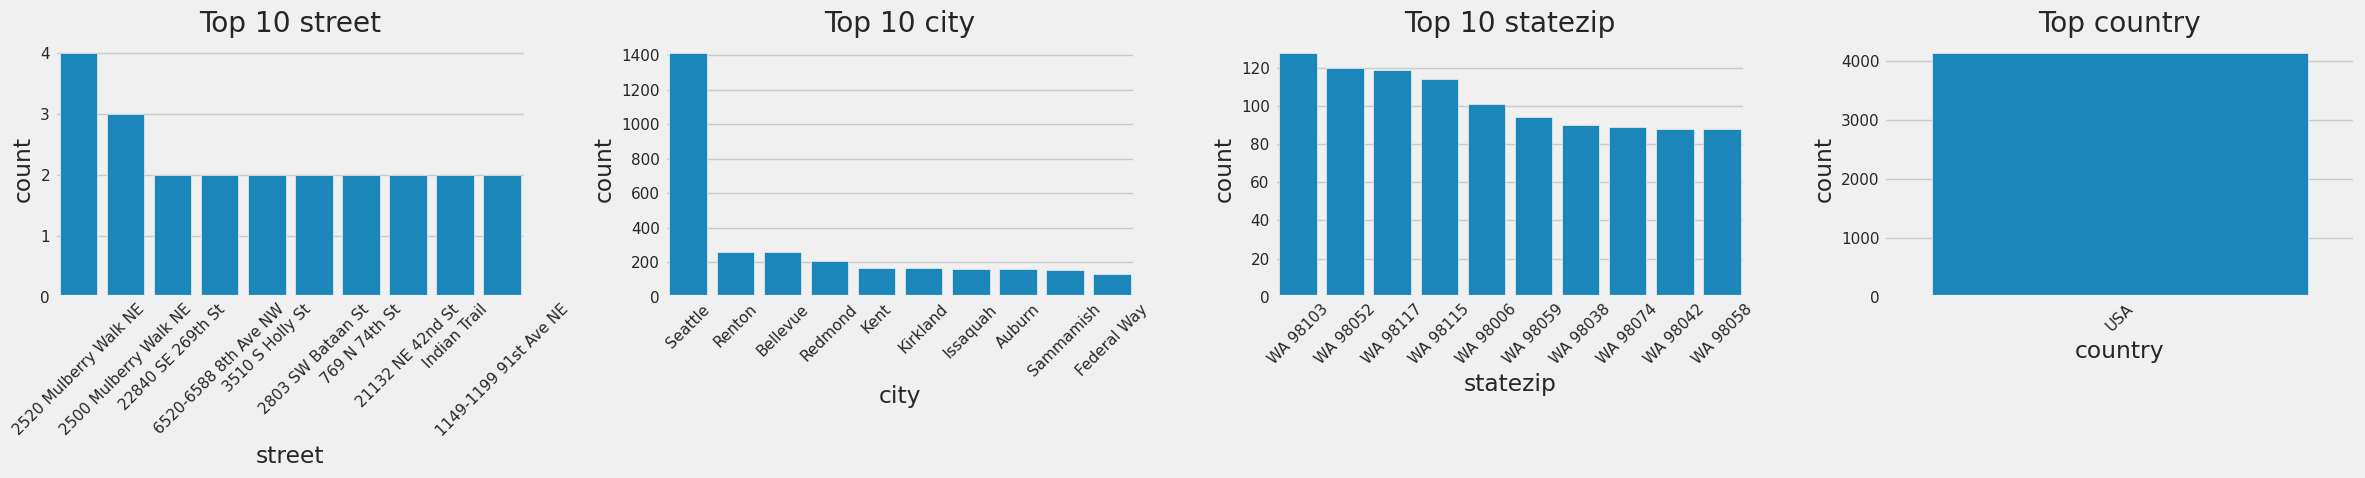

In [16]:
# Univariate Analysis for Categorical Features (Top 10)
n = len(cats)
fig, axes = plt.subplots(1, n, figsize=(6*n, 5))  # 1 row, and column

for i, col in enumerate(cats):
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(
        data=df[df[col].isin(top_10)],
        x=col,
        order=top_10,
        ax=axes[i]
    )
    if col == 'country':
        axes[i].set_title(f'Top {col}')
    else:
      axes[i].set_title(f'Top 10 {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Based on the histogram above, the following conclusions can be drawn:
1. Seattle is the most dominant location in this dataset, with over 1,400 listings. Other cities such as Renton, Bellevue, and Redmond have much lower frequencies (ranging from 200 to 300), indicating that this dataset is highly concentrated on the Seattle property market.
2. The country feature has only one unique value, USA. Because it has no variance (all data values ​​are equal), this feature provides no discriminating power for the regression model and should be dropped in the Feature Engineering stage to reduce unnecessary data dimensionality.
3. All zip codes begin with the prefix WA, confirming that all home listings are located in Washington State. Zip code 98103 is the area with the highest number of listings. This feature typically has a very high correlation with home prices because location determines the prestige of a property.
4. The street feature exhibits a very large number of unique values ​​(high cardinality), with the most frequently occurring address only recorded four times. Using this feature directly in the model (e.g., via One-Hot Encoding) will introduce the dimensionality curse. I might need to perform feature extraction or ignore this column if the city and statezip features are sufficient to represent location information, or simply use one-hot encoding on the top 10 streets and put the rest into others.

### Multivariate Analysis

#### Corelation Between numerical features and target or another numerical features

In [17]:
#See the correlation score
df[nums].corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
date,1.000000,0.037440,0.008328,0.018511,0.028564,-0.017216,0.029296,0.013444,-0.008016,0.007689,0.042348,-0.019659,0.000183,-0.022033
price,0.037440,1.000000,0.188765,0.317785,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,0.204066,0.027067,-0.028272
bedrooms,0.008328,0.188765,1.000000,0.542549,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,0.329862,0.153514,-0.069439
bathrooms,0.018511,0.317785,0.542549,1.000000,0.760353,0.097497,0.487462,0.080152,0.210590,-0.123024,0.687679,0.292170,0.470814,-0.221307
sqft_living,0.028564,0.418528,0.590110,0.760353,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,0.439053,0.296545,-0.124646
sqft_lot,-0.017216,0.045964,0.065747,0.097497,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,0.023567,0.047224,-0.020308
floors,0.029296,0.143180,0.178908,0.487462,0.345130,-0.001113,1.000000,0.021278,0.030604,-0.275212,0.524777,-0.261826,0.470139,-0.234445
waterfront,0.013444,0.131401,-0.001286,0.080152,0.126157,0.019229,0.021278,1.000000,0.359237,0.004027,0.081076,0.109736,-0.031891,0.014030
view,-0.008016,0.217553,0.105512,0.210590,0.308098,0.071264,0.030604,0.359237,1.000000,0.064440,0.167270,0.325002,-0.067859,0.028837
condition,0.007689,0.030327,0.016503,-0.123024,-0.069315,0.012016,-0.275212,0.004027,0.064440,1.000000,-0.183599,0.197656,-0.400394,-0.187971


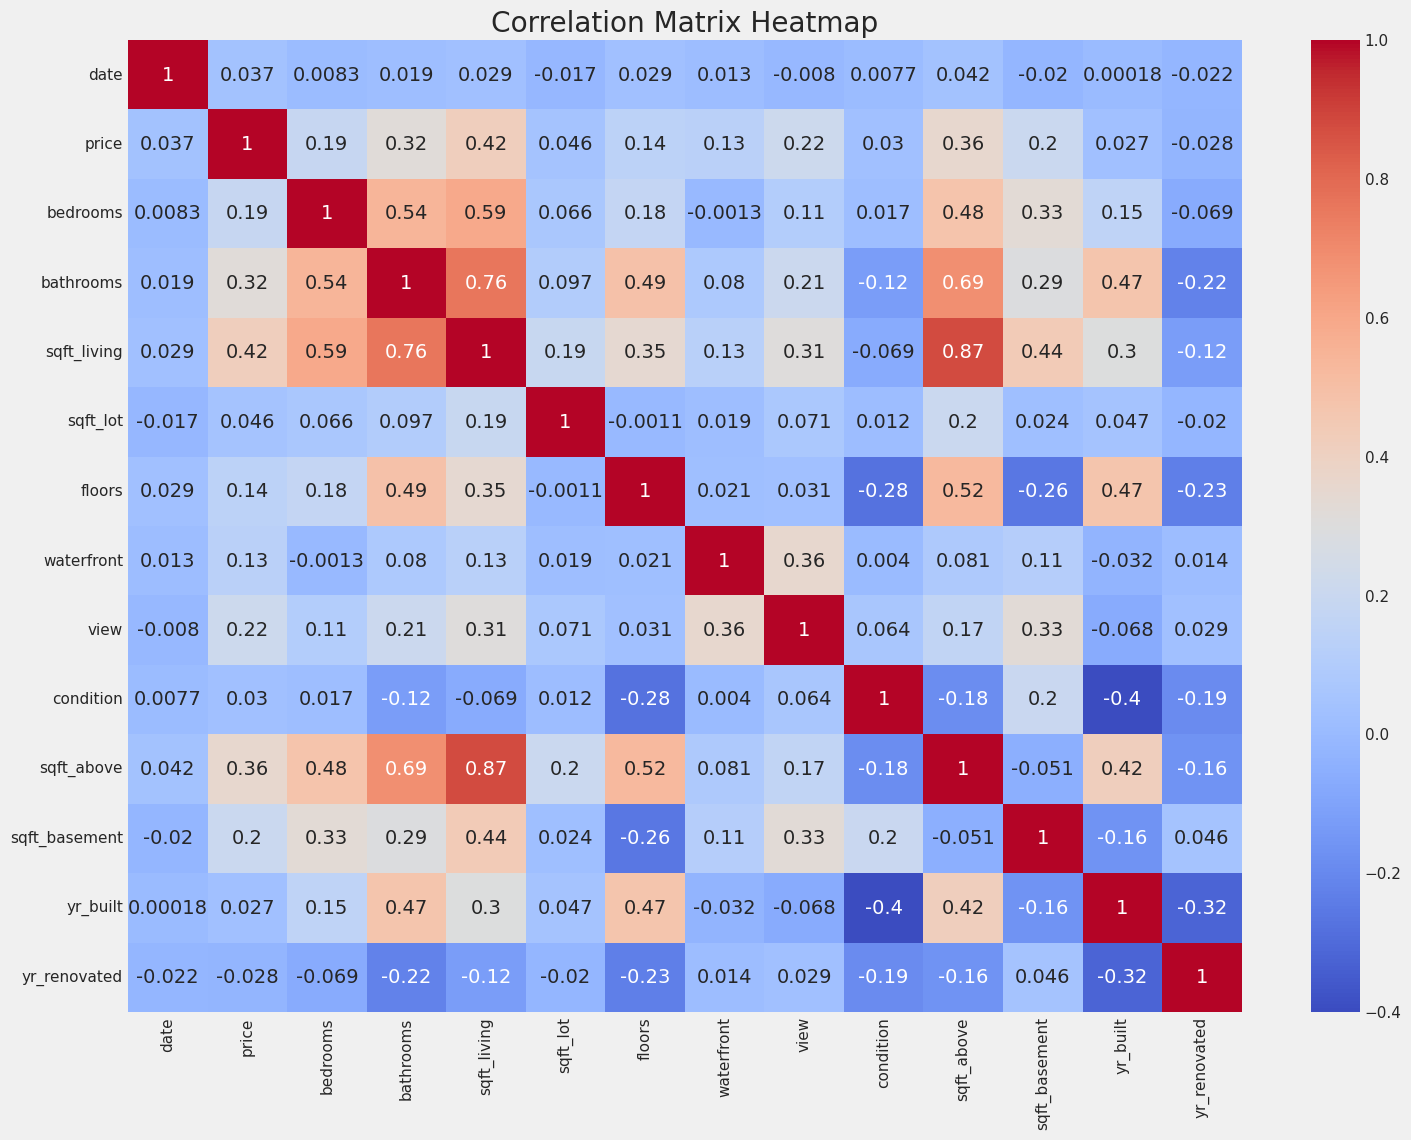

In [18]:
#Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

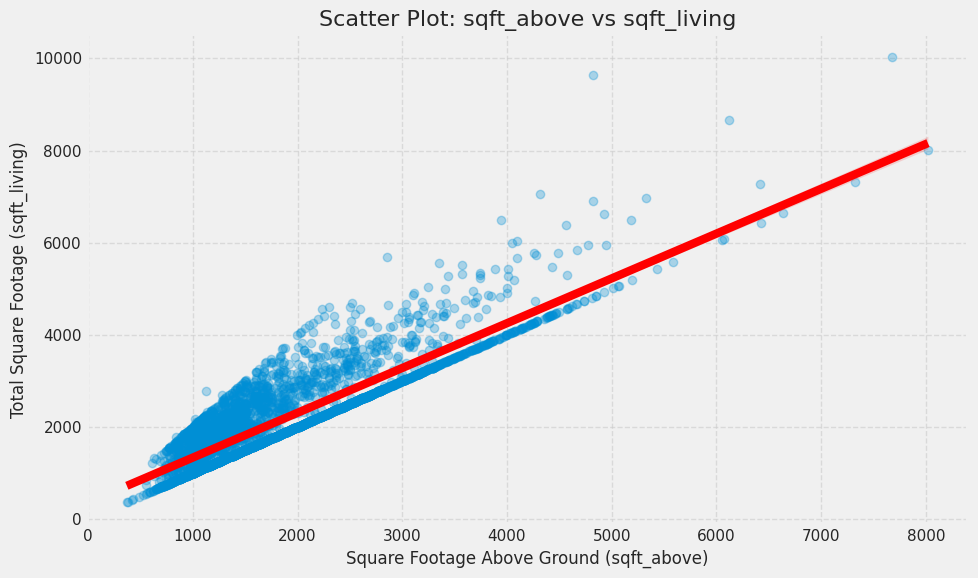

In [19]:
# Scatter Plot graph specifically for the sqft_living vs sqft_above feature pair so we can see how linear the data redundancy is
# Set the visual theme to be consistent with the previous analysis.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))

# Using regplot to automatically view linear trend lines
sns.regplot(data=df, x='sqft_above', y='sqft_living',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Scatter Plot: sqft_above vs sqft_living', fontsize=16)
plt.xlabel('Square Footage Above Ground (sqft_above)', fontsize=12)
plt.ylabel('Total Square Footage (sqft_living)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Multivariate Analysis: Numerical Features & Target Relationship**

The purpose of this analysis is to understand the strength of the linear relationship between the numeric features and the target variable (`price`), as well as to identify any multicollinearity between independent features that could affect the performance of the regression model.

1. **Correlation Matrix Analysis (Heatmap)**:

    Based on the Correlation Matrix Heatmap, several key insights are available regarding the factors driving house prices:

    **Main Predictors of Price**:

    - `sqft_living` has the strongest positive correlation with price, with a value of 0.42. This indicates that the total building area is the most dominant factor in determining property prices.

    - `sqft_above` (0.36)` and `bathrooms` (0.32)` follow as other important predictors. This aligns with business logic, where increasing the area of ​​the upper floor and the number of sanitary facilities increases the selling price.

    **Features with Weak Correlations**:

    - Features such as `condition (0.03), yr_built (0.027), and sqft_lot (0.046)` show very low correlations approaching zero. This indicates that these features do not have a direct linear relationship with prices on a global scale, requiring further transformation (such as converting years to house age) to improve their predictive power.

    **Multicollinearity Identification**:

    - There is a very high correlation between sqft_living and sqft_above at 0.87.

    - In addition, sqft_living is also strongly correlated with bathrooms (0.76).

    - Action: High correlations between these independent features (especially above 0.80) indicate information redundancy that can cause the linear regression model to become unstable.

2. **Visualization of Relationships Between Features (Scatter Plot)**

    To verify the multicollinearity findings in the heatmap, a plot was performed between sqft_above and sqft_living:

    - **Perfect Linear Pattern**: The plot shows data points closely following the red regression line, visually confirming the 0.87 correlation.

    - **Building Structure Insights**: *Points directly on the red line represent homes without a basement (where sqft_above = sqft_living).

    - Points above the red line indicate properties with an additional basement.

    - **Technical Conclusion**: Because these two features carry nearly identical information, retaining both in the model can introduce noise.

**Preprocessing Strategy Based on Analysis**

Based on the findings above, the steps I will take in the next stage are:

1. Feature Selection: Remove one of the highly correlated features. I chose to retain sqft_living and remove sqft_above because it has a higher correlation with the target price. I will also use these features in the modeling to see their correlation with the target (`price`):

    - `sqft_living`: This is the strongest predictor with a correlation of 0.42. This feature is mandatory (Log Transformation is recommended).

    - `bathrooms`: Has a fairly strong correlation of 0.32.

    - `view`: Shows a moderate correlation of 0.22.

    - `sqft_basement`: Has a correlation of 0.2 with price.

    - `bedrooms`: Has a correlation of 0.19.

    - `floors`: Has a correlation of 0.14.

2. Feature Extraction: Instead of using yr_renovated, which has a low correlation (-0.028), I will transform it into a binary feature, is_renovated (renovated or not), to capture non-linear patterns. I will also create a new feature, `house_age`, to replace `yr_built` (which has a correlation of only 0.027). House age typically has a more logical relationship with property prices.

3. Handling Skewness: Log-transforming the building area (sqft) and target price features to normalize the distribution before entering regression modeling.

#### Corelation Between categorical features and target or another categorical features

/tmp/ipython-input-4280346980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4280346980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4280346980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


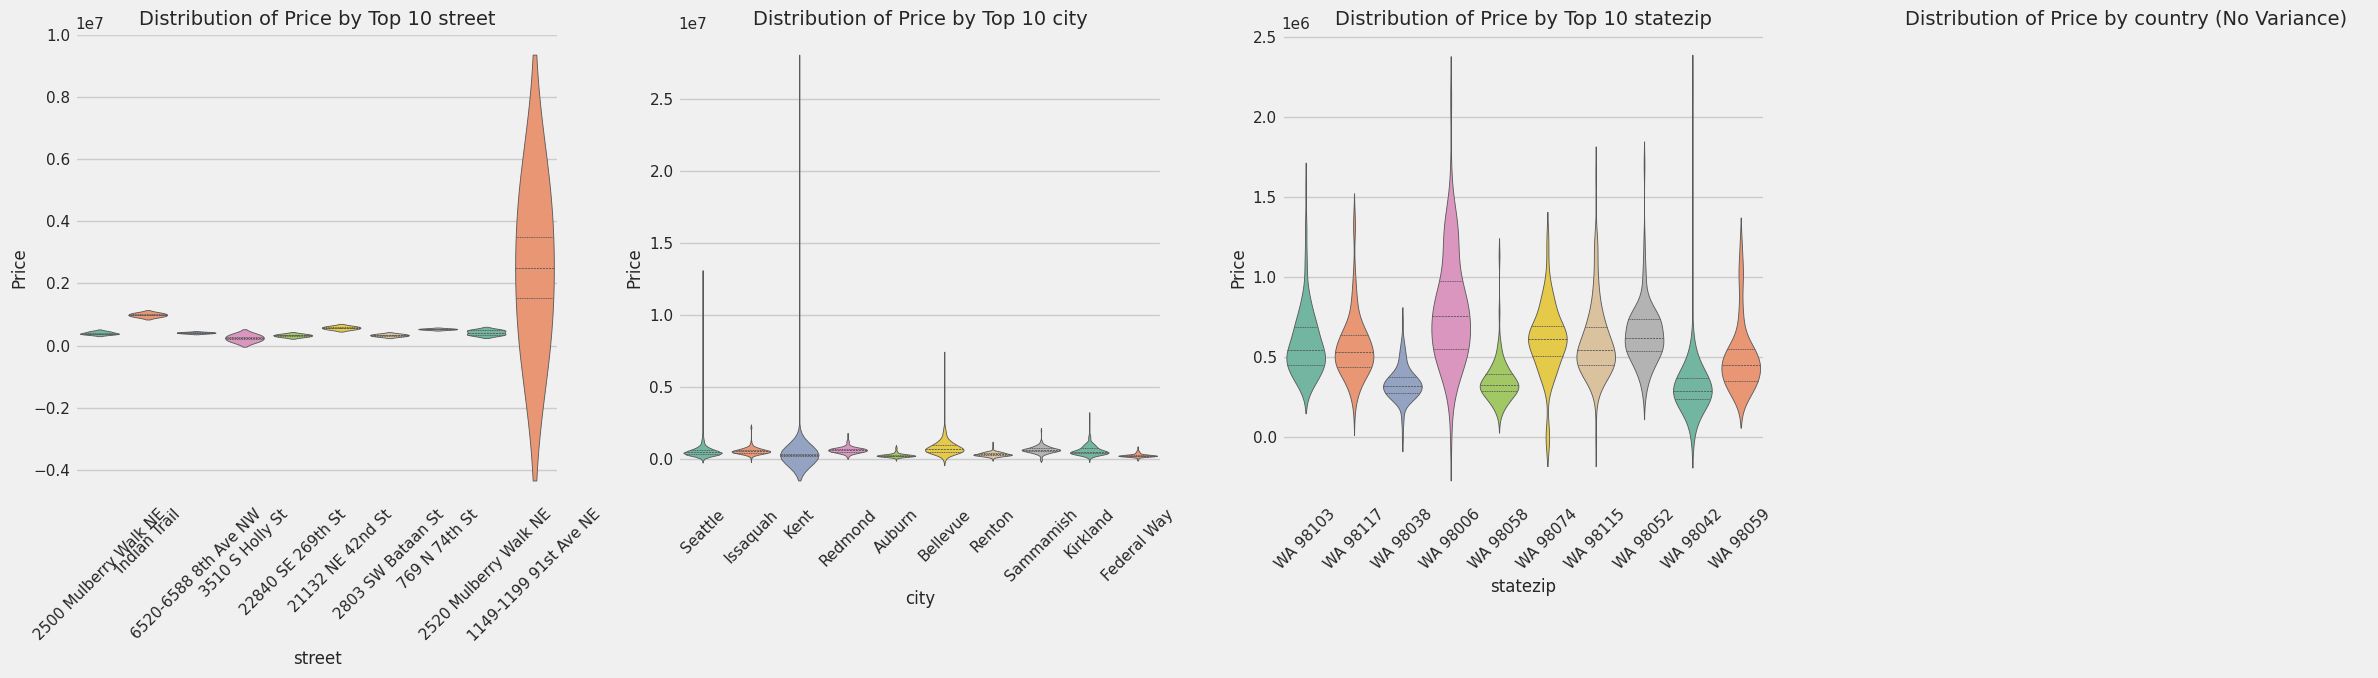

In [20]:
# Violin Plot To see the correlation between target and categorical features
fig, axes = plt.subplots(1, len(cats), figsize=(6*len(cats), 7))

for i, col in enumerate(cats):
    if col == 'country':
        # For 'country', we've identified it has only one unique value ('USA'),
        # so a violin plot won't show distribution across categories.
        # We can skip it or plot a single violin if desired, but for now,
        # it's best to acknowledge its lack of variance for this type of plot.
        # I'll just keep the structure for now, but it won't be very informative.
        # Based on previous analysis, 'country' will be dropped anyway.
        axes[i].axis('off') # Turn off axis for the 'country' plot as it's not informative
        axes[i].set_title(f'Distribution of Price by {col} (No Variance)', fontsize=14)

    else:
        top_10 = df[col].value_counts().head(10).index
        sns.violinplot(
            data=df[df[col].isin(top_10)],
            x=col,
            y='price',
            ax=axes[i],
            palette='Set2',
            inner='quartile' # Menampilkan garis kuartil di dalam violin
        )
        axes[i].set_title(f'Distribution of Price by Top 10 {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Price', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Multivariate Analysis: Categorical Features vs. Price**

This analysis uses a violin plot to examine the price distribution across various location categories. The width of the "violin" indicates the density of data within a specific price range, while the middle line represents the median and quartile values.

1. Analysis by City (City vs. Price)
    - **Price Variation Between Cities**: Although Seattle has the largest number of listings, cities like Bellevue and Redmond tend to have higher median prices and a wider distribution range toward the top.

    - **Affordable Areas**: Cities like Auburn and Federal Way exhibit a much lower and more concentrated price distribution, indicating these areas are more affordable property markets.

    - **Insight**: The significant differences in median prices between cities confirm that city features are a very strong predictor for the regression model.

2. **Analysis by Zip Code (Statezip vs. Price)**

    - **Micro Location Segmentation**: The visualization shows very significant price differences between zip codes. For example, WA zip code 98006 has a much higher price distribution than WA 98059.

    - **Presence of Outliers**: Some zip codes have very long upper "tails," indicating the presence of luxury homes in certain areas whose prices far exceed the average market price in that area.

    - **Insight**: Location at the zip code level provides more precise geographic information than city, making this feature crucial to maintain.
3. **Analysis by Street Name (Street vs. Price)**
    - **High Cardinality & Noise**: Most streets show similar price distributions because there is little data for each street. However, there are anomalies in some streets (such as the rightmost street in the plot) that have very extreme price ranges.

    - **Insight**: Because each address is highly unique (high cardinality), this feature risks overfitting. The previous recommendation to encode only the top street or remove it remains valid.

**Strategic Conclusions for Feature Engineering**

Based on this categorical multivariate analysis, the steps I will take are:

1. Location Prioritization: Retaining city and statezip as the primary predictors because price variation between categories is very clear.

2. Strategic Encoding: Using Target Encoding on statezip to capture the average price value in each area without excessively increasing the column dimensionality as with One-Hot Encoding.

3. Final Cleaning: Removing country (due to zero variance) and street (due to too specific/noise).

## Feature Engineering

### Feature Extraction

In [21]:
# Making the feature is_renovated (Binary)
# If yr_renovated > 0 then 1 (Ever), if 0 then 0 (Never)
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Create a house_age feature (House Age)
# Make sure the 'date' column has been casted to datetime beforehand.
df['house_age'] = df['date'].dt.year - df['yr_built']

# Delete the original columns to avoid redundancy (Multicollinearity)
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

# Show top 5 data for verification
df[['is_renovated', 'house_age']].head()

,is_renovated,house_age
0,0,6
1,0,7
2,0,4
3,0,7
4,0,35


In [22]:
# Calculate total room
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Calculating the Building Area to Land Ratio
df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']

# Calculating the Area per Room
df['living_per_bedroom'] = df['sqft_living'] / (df['bedrooms'] + 1) # +1 to avoid division by zero

# Binary Features for Basement
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Interaction between Age and Condition
df['age_times_condition'] = df['house_age'] * df['condition']

# Show the top 5 data for the new feature
print(df[['total_rooms', 'sqft_ratio', 'has_basement', 'age_times_condition']].head())

   total_rooms  sqft_ratio  has_basement  age_times_condition
0         5.00    0.968208             0                   18
1         7.25    0.022204             0                   21
2        11.50    0.055916             1                   12
3         5.25    1.103982             1                   21
4         7.75    0.436208             1                  175


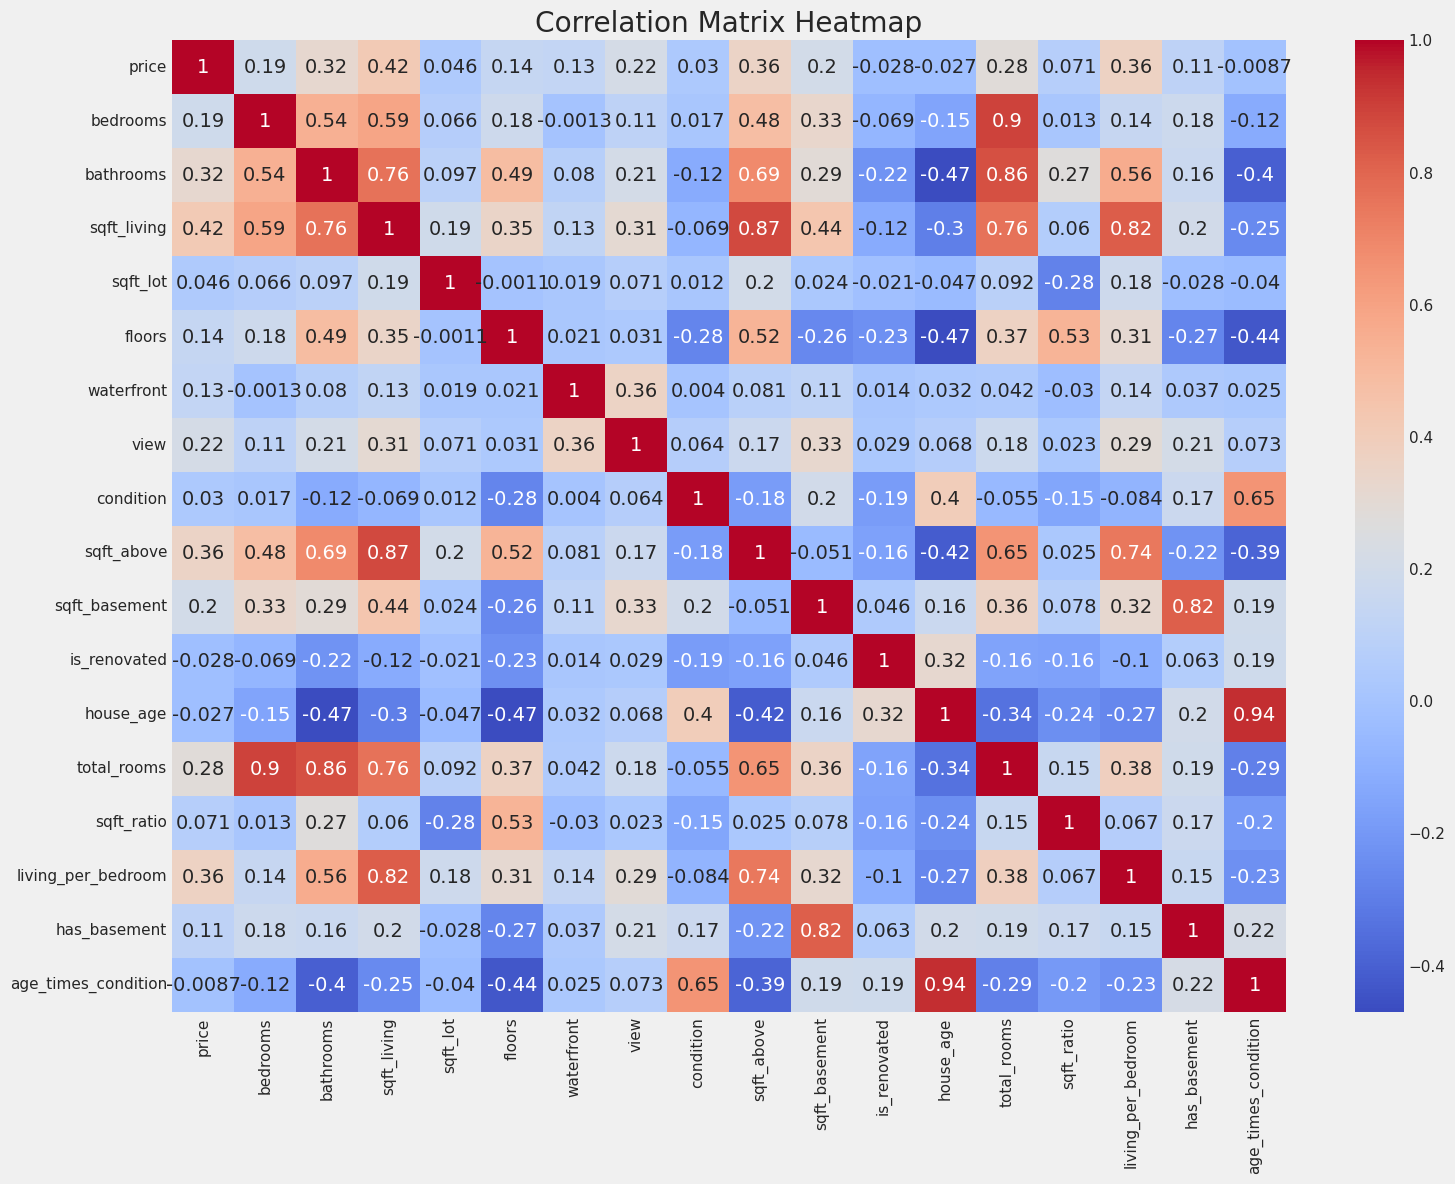

In [23]:
#Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

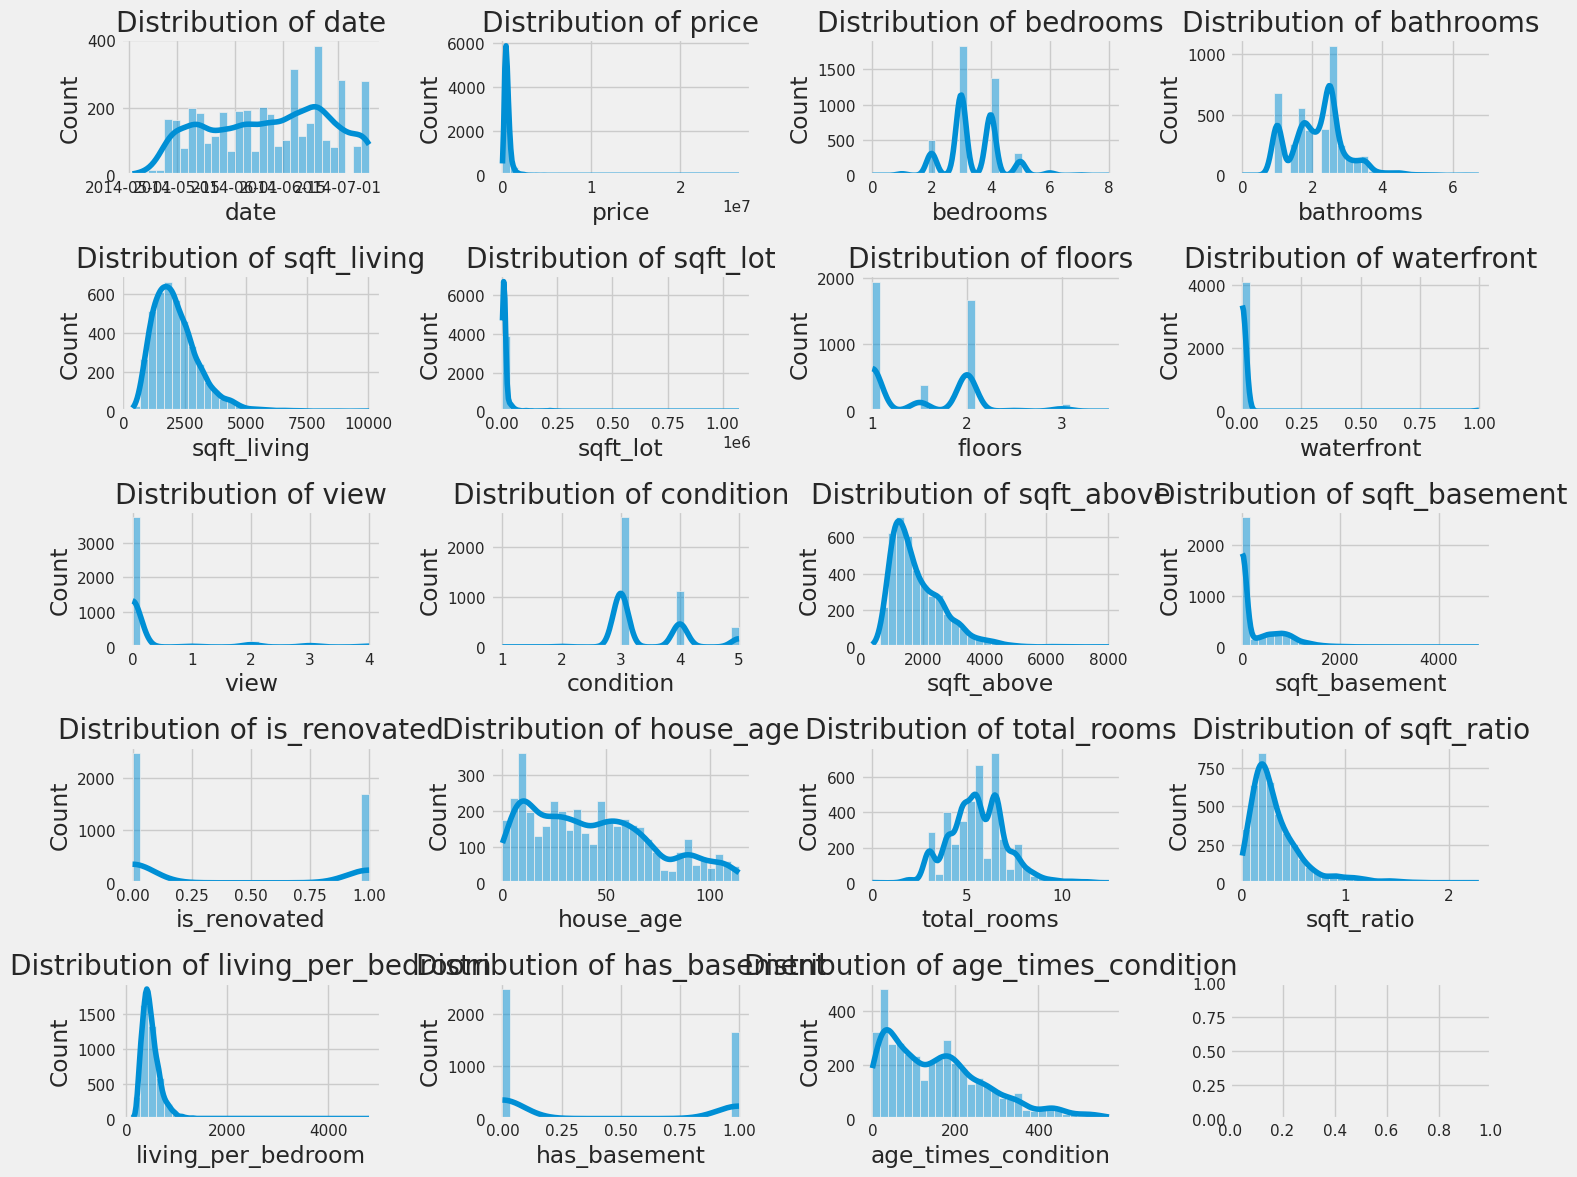

In [24]:
#Check distribution of numerical features again
nums =  df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

rows = 5
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

for i, col in enumerate(nums):
    r, c = divmod(i, cols)
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[r][c])
    axes[r][c].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

living_per_bedroom have a right skewed.

### Feature Selection

In [25]:
# List of features to be used
features = [
    'bathrooms', 'sqft_living',
    'floors', 'view',
    'sqft_basement', 'city', 'statezip', 'living_per_bedroom'
]

#print features
df[features].sample(5)

,bathrooms,sqft_living,floors,view,sqft_basement,city,statezip,living_per_bedroom
323,2.50,2320,2.0,2,0,North Bend,WA 98045,580.000000
735,2.50,2860,2.0,0,0,Sammamish,WA 98075,572.000000
1555,2.25,1900,1.0,0,0,Federal Way,WA 98023,380.000000
629,4.00,4850,2.0,0,0,Bellevue,WA 98005,808.333333
1489,2.25,1330,1.5,0,0,Bellevue,WA 98005,266.000000


## Data Cleaning

I want to remove data with a house price of 0, a number of bedrooms, or a number of bathrooms. I do this because, in the case of property prices, a value of 0 in these features is considered an anomaly or noise that needs to be removed to prevent model bias. I'm afraid my model will suffer from systematic bias because it will tend to predict prices that are much lower than the actual market price.

In [26]:
# Clean data with a house price of 0
df_clean = df[df['price'] > 0].copy()

# Clean the house data who dont have any bedrooms or bathrooms
df_clean = df_clean[(df_clean['bedrooms'] > 0) & (df_clean['bathrooms'] > 0)]

print(f"Real Data: {len(df)}")
print(f"Data After Cleaning: {len(df_clean)}")
print(f"Amount of Deleted Rows: {len(df) - len(df_clean)}")

Real Data: 4140
Data After Cleaning: 4089
Amount of Deleted Rows: 51


In [27]:
#Outlier Filtering (Batasi harga < $1.5M)
df_filtered = df_clean[df_clean['price'] < 1500000].copy()

## Training Model

### Split Train/Test

In [28]:
# Variabel Definition
X = df_filtered[features].copy() #features
y = df_filtered['price'] #target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Succesfullt Split The Data!")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

Succesfullt Split The Data!
X_train: (3186, 8), X_test: (797, 8)


### Log Transformation

Skewness y_train_log: -0.28


array([[<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'living_per_bedroom'}>]], dtype=object)

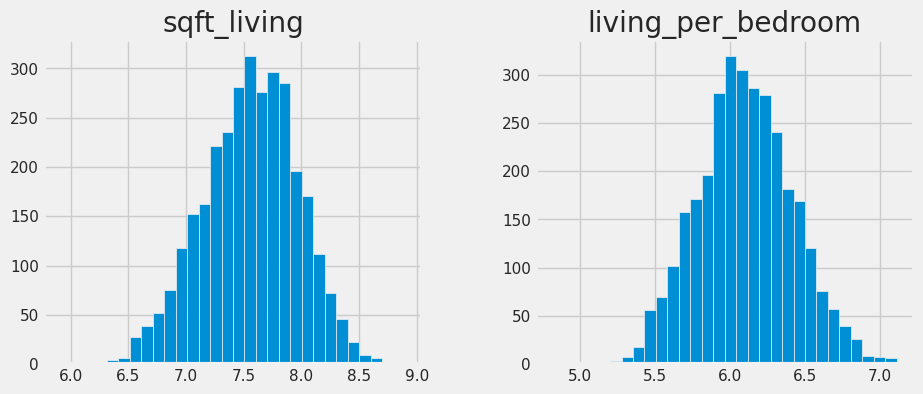

In [29]:
#Log transformation to train & test feature or targets
# Using log1p (log 1 + x) for mathematical security
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# verification of skewness after transformation
print(f"Skewness y_train_log: {y_train_log.skew():.2f}")

# List Of Skewed Features
skewed_features = ['sqft_living', 'living_per_bedroom']

# Apply transformations to training and testing data
for col in skewed_features:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

# Checking the transformation results
X_train[skewed_features].hist(figsize=(10, 4), bins=30)

### Target Encoding

In [30]:
# TargetEncoder Initialization
# Specify the 'city' and 'statezip' columns to be encoded.
encoder = TargetEncoder(cols=['city', 'statezip'])

# Fit and Transform on Training Data
# Use y_train_log as the reference target for the encoder
# calculate the average price in a normalized logarithmic scale.
X_train = encoder.fit_transform(X_train, y_train_log)

# Transform on Testing Data
# Just use transform to make the model use the average value of the training data,
# thus preventing data leakage.
X_test = encoder.transform(X_test)

# Display top 5 data to see the results of the changes
print("Hasil Target Encoding (Nilai rata-rata log_price per area):")
display(X_train[['city', 'statezip']].head())

Hasil Target Encoding (Nilai rata-rata log_price per area):


,city,statezip
567,13.105610,12.814424
1625,13.048890,13.048890
613,13.255001,13.056221
450,13.467541,13.305530
1817,12.687295,12.299824


### Scaling

In [31]:
#Standarization in numerical features
# Define a list of numeric columns
num_features = [
    'bathrooms', 'sqft_living',
    'floors', 'view',
    'sqft_basement', 'city', 'statezip', 'living_per_bedroom'
]

# Inisialisation of StandardScaler
scaler = StandardScaler()

# Fit to training data & Transform to both of datasets
# We only change the numeric columns in the DataFrame X_train and X_test.
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Verification: Check the mean (should be close to 0) and std deviation (should be close to 1)
X_train[num_features].head()

,bathrooms,sqft_living,floors,view,sqft_basement,city,statezip,living_per_bedroom
567,0.177167,1.465910,-0.933481,5.257481,3.097476,0.255162,-0.693959,1.423121
1625,1.207821,0.984972,0.956017,-0.287610,1.086613,0.054108,0.052909,0.221760
613,-0.853487,-1.618266,-0.933481,-0.287610,-0.675715,0.784703,0.076260,-1.886530
450,0.177167,-0.371030,0.956017,-0.287610,-0.675715,1.538090,0.870411,-0.264342
1817,-0.853487,-0.571111,-0.933481,-0.287610,-0.675715,-1.227629,-2.333167,-1.802019


### Modeling

#### Linear Regression

In [32]:
# Model Initialization and Training
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train_log)

# 2. Making Predictions on Test Data
y_pred_log = baseline_model.predict(X_test)

# --- Evaluation on a Logarithmic Scale ---
r2 = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

# --- Evaluation on Original Price Scale (USD) ---
# Returns the log value to the original price using expm1 (inverse of log1p)
y_test_original = np.expm1(y_test_log)
y_pred_original = np.expm1(y_pred_log)

rmse_usd = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print(f"--- Baseline Model Performance ---")
print(f"R-Squared (R2) : {r2:.4f}")
print(f"RMSE (Log Scale): {rmse_log:.4f}")
print(f"RMSE (USD)      : ${rmse_usd:,.2f}")

--- Baseline Model Performance ---
R-Squared (R2) : 0.7155
RMSE (Log Scale): 0.2600
RMSE (USD)      : $140,741.81


In [33]:
#Check overfitting
# Prediction of Two Datasets(training and test)
y_pred_train_log = baseline_model.predict(X_train)
y_pred_test_log = baseline_model.predict(X_test)

# Count the R-squared
r2_train = r2_score(y_train_log, y_pred_train_log)
r2_test = r2_score(y_test_log, y_pred_test_log)

# Count the RMSE (In USD Scale)
# turn back to the original scale use np.expm1
rmse_train_usd = np.sqrt(mean_squared_error(np.expm1(y_train_log), np.expm1(y_pred_train_log)))
rmse_test_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_log)))

# Display in comparison table
evaluation_results = pd.DataFrame({
    'Metric': ['R-Squared', 'RMSE (USD)'],
    'Train Set': [f"{r2_train:.4f}", f"${rmse_train_usd:,.2f}"],
    'Test Set': [f"{r2_test:.4f}", f"${rmse_test_usd:,.2f}"],
    'Gap': [f"{abs(r2_train - r2_test):.4f}", f"${abs(rmse_train_usd - rmse_test_usd):,.2f}"]
})

display(evaluation_results)

,Metric,Train Set,Test Set,Gap
0,R-Squared,0.7518,0.7155,0.0364
1,RMSE (USD),"$134,965.20","$140,741.81","$5,776.61"


In [34]:
# Cross Validation with 5-fold K
# We use the 'r2' metric for consistency with previous evaluations.
cv_scores = cross_val_score(baseline_model, X_train, y_train_log, cv=5, scoring='r2')

# Display the results for each fold
print(f"R-Squared Score in each fold: {cv_scores}")
print(f"Mean R-Squared    : {cv_scores.mean():.4f}")
print(f"Standard Deviation       : {cv_scores.std():.4f}")

R-Squared Score in each fold: [0.74860784 0.77572471 0.72538633 0.74603088 0.75454934]
Mean R-Squared    : 0.7501
Standard Deviation       : 0.0162


In [35]:
#Find The best alpha value with RidgeCV
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train_log)

print(f"Best alpha tuning result: {ridge_cv.alpha_}")

# Ridge Model Initialization and Training
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train, y_train_log)

# Prediction on Train and Test Data
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

# R-Squared Evaluation
r2_train_ridge = r2_score(y_train_log, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_log, y_pred_test_ridge)

# RMSE Evaluation (USD Scale)
rmse_test_ridge_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_ridge)))

print(f"--- Ridge Regression Performance ---")
print(f"R-Squared Train : {r2_train_ridge:.4f}")
print(f"R-Squared Test  : {r2_test_ridge:.4f}")
print(f"Gap (Overfitting): {abs(r2_train_ridge - r2_test_ridge):.4f}")
print(f"RMSE (USD)      : ${rmse_test_ridge_usd:,.2f}")

Best alpha tuning result: 10.0
--- Ridge Regression Performance ---
R-Squared Train : 0.7518
R-Squared Test  : 0.7158
Gap (Overfitting): 0.0360
RMSE (USD)      : $140,713.21


#### Random Forest

In [36]:
# Model Initialization
# n_estimators: Number of trees in the "forest"
# random_state: Ensure consistent results
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training Model
rf_model.fit(X_train, y_train_log)

# Prediction
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Metrik Evaluation
r2_train_rf = r2_score(y_train_log, y_pred_train_rf)
r2_test_rf = r2_score(y_test_log, y_pred_test_rf)
rmse_test_rf_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_rf)))

print(f"--- Random Forest Performance ---")
print(f"R-Squared Train : {r2_train_rf:.4f}")
print(f"R-Squared Test  : {r2_test_rf:.4f}")
print(f"Gap Overfitting : {abs(r2_train_rf - r2_test_rf):.4f}")
print(f"RMSE (USD)      : ${rmse_test_rf_usd:,.2f}")

--- Random Forest Performance ---
R-Squared Train : 0.9684
R-Squared Test  : 0.7331
Gap Overfitting : 0.2353
RMSE (USD)      : $131,740.38


In [37]:
#Define the search space (Hyperparameter Space)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Control amount of feature in every split
}

# RandomizedSearchCV initialization
rf_tuned = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20, # Trying 20 random combinations
    cv=5,      # Cross-validation 5-fold
    scoring='r2',
    n_jobs=-1, # Using All core prosesor
    random_state=42
)

# Fitting Model
rf_tuned.fit(X_train, y_train_log)

print(f"Best Parameter: {rf_tuned.best_params_}")

# Use the best model
best_rf = rf_tuned.best_estimator_

y_pred_train_final = best_rf.predict(X_train)
y_pred_test_final = best_rf.predict(X_test)

r2_train_final = r2_score(y_train_log, y_pred_train_final)
r2_test_final = r2_score(y_test_log, y_pred_test_final)
rmse_final_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_final)))

print(f"--- Tuned Random Forest Performance ---")
print(f"R-Squared Train : {r2_train_final:.4f}")
print(f"R-Squared Test  : {r2_test_final:.4f}")
print(f"New Gap       : {abs(r2_train_final - r2_test_final):.4f}")
print(f"RMSE (USD)      : ${rmse_final_usd:,.2f}")

Best Parameter: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
--- Tuned Random Forest Performance ---
R-Squared Train : 0.9066
R-Squared Test  : 0.7531
New Gap       : 0.1535
RMSE (USD)      : $126,974.20


#### XGBoost

In [38]:
# Initialize Model with Early Stopping in Constructor

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train_log, test_size=0.1, random_state=42)

# Initialize XGBoost with tighter parameters (Conservative)
xgb_final = xgb.XGBRegressor(
  n_estimators=2000,
  learning_rate=0.01, # Slowed down 5x for greater accuracy
  max_depth=3, # Very short trees to prevent "memorization"
  min_child_weight=5, # Minimum data in one leaf (similar to min_samples_leaf)
  subsample=0.7,
  colsample_bytree=0.7,
  reg_alpha=1.0, # Increased L1 for automatic feature selection
  reg_lambda=5.0, # Increased L2 to suppress extreme coefficients
  random_state=42,
  early_stopping_rounds=100, # Longer wait due to small learning_rate
  eval_metric='rmse'
)

xgb_final.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Prediction and Evaluation
y_pred_train_xgb = xgb_final.predict(X_train)
y_pred_test_xgb = xgb_final.predict(X_test)

r2_train_xgb = r2_score(y_train_log, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test_log, y_pred_test_xgb)
rmse_test_xgb_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_xgb)))

print(f"--- XGBoost Performance (Fixed) ---")
print(f"Best Iteration  : {xgb_final.best_iteration}")
print(f"R-Squared Train : {r2_train_xgb:.4f}")
print(f"R-Squared Test  : {r2_test_xgb:.4f}")
print(f"Gap (Variance)  : {abs(r2_train_xgb - r2_test_xgb):.4f}")
print(f"RMSE (USD)      : ${rmse_test_xgb_usd:,.2f}")

--- XGBoost Performance (Fixed) ---
Best Iteration  : 1993
R-Squared Train : 0.8338
R-Squared Test  : 0.7547
Gap (Variance)  : 0.0791
RMSE (USD)      : $126,281.25


/tmp/ipython-input-3104157772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


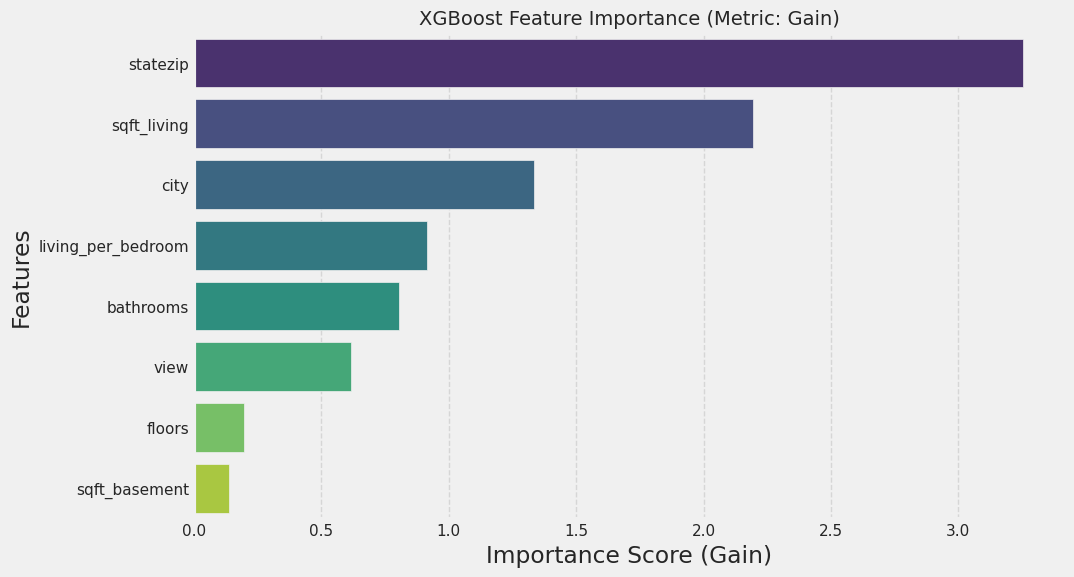

In [39]:
# Taking importance score (Gain) from XGBoost
importance_types = 'gain'
importance_scores = xgb_final.get_booster().get_score(importance_type=importance_types)

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': list(importance_scores.keys()),
    'Importance': list(importance_scores.values())
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title(f'XGBoost Feature Importance (Metric: {importance_types.capitalize()})', fontsize=14)
plt.xlabel('Importance Score (Gain)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

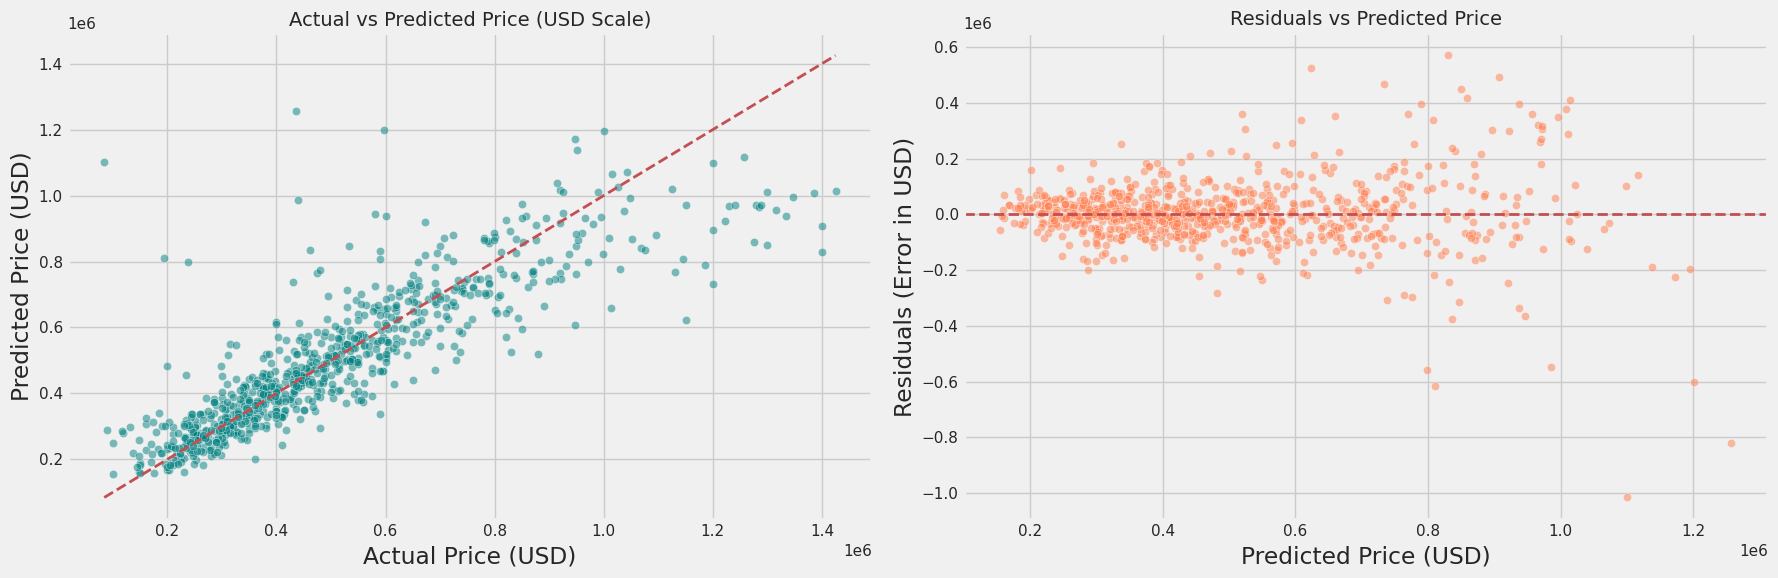

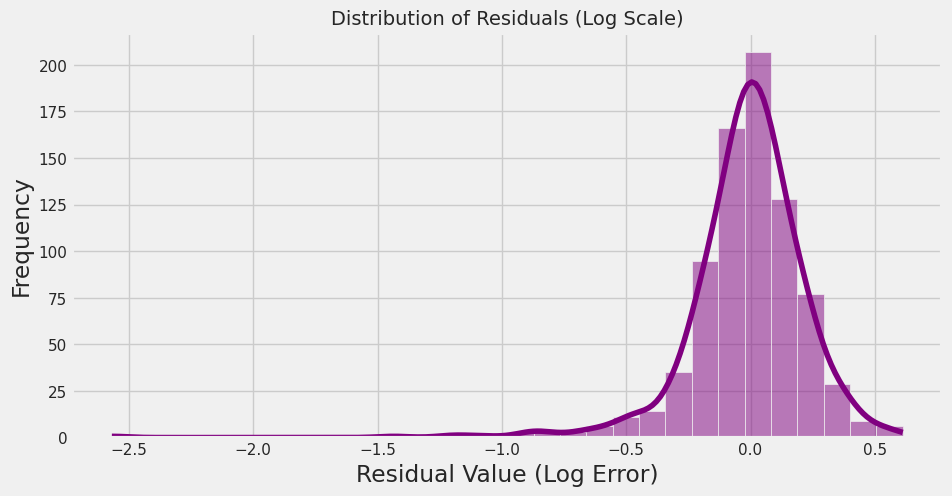

In [40]:
# 1. Preparing Data (Make sure this variable already exists from the previous process)
# y_test_log is the actual value in log scale
# y_pred_test_xgb is the prediction result from the XGBoost model in log scale
residuals_log = y_test_log - y_pred_test_xgb

# Convert back to USD scale to see the actual error
y_test_usd = np.expm1(y_test_log)
y_pred_usd = np.expm1(y_pred_test_xgb)
residuals_usd = y_test_usd - y_pred_usd

# 2. Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1: Actual vs Predicted (USD Scale) ---
sns.scatterplot(x=y_test_usd, y=y_pred_usd, alpha=0.5, ax=axes[0], color='teal')
axes[0].plot([y_test_usd.min(), y_test_usd.max()], [y_test_usd.min(), y_test_usd.max()],
            'r--', lw=2) # Garis diagonal sempurna
axes[0].set_title('Actual vs Predicted Price (USD Scale)', fontsize=14)
axes[0].set_xlabel('Actual Price (USD)')
axes[0].set_ylabel('Predicted Price (USD)')

# --- Plot 2: Residual Plot (Checking Homoscedasticity) ---
sns.scatterplot(x=y_pred_usd, y=residuals_usd, alpha=0.5, ax=axes[1], color='coral')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2) # Garis nol
axes[1].set_title('Residuals vs Predicted Price', fontsize=14)
axes[1].set_xlabel('Predicted Price (USD)')
axes[1].set_ylabel('Residuals (Error in USD)')

plt.tight_layout()
plt.show()

# --- Plot 3: Distribution of Residuals (Checking Normality) ---
plt.figure(figsize=(10, 5))
sns.histplot(residuals_log, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals (Log Scale)', fontsize=14)
plt.xlabel('Residual Value (Log Error)')
plt.ylabel('Frequency')
plt.show()

#### Stacking Regressor

In [41]:
# Definition of Base Models
base_models = [
    ('ridge', Ridge(alpha=10.0)),
    ('rf', RandomForestRegressor(n_estimators=300, min_samples_split=10,
                                 min_samples_leaf=1, max_features='log2',
                                 max_depth=20, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6,
                             reg_alpha=0.1, reg_lambda=1.0, random_state=42))
]

# Definition of Stacking Regressor
# Meta-learner uses a simple LinearRegression
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5 # Internal cross-validation to train the meta-learner
)

# Training
stacking_model.fit(X_train, y_train_log)

# 1. Predictions on Train and Test Data
y_pred_train_stack = stacking_model.predict(X_train)
y_pred_test_stack = stacking_model.predict(X_test)

# 2. Calculate R-Squared
r2_train_stack = r2_score(y_train_log, y_pred_train_stack)
r2_test_stack = r2_score(y_test_log, y_pred_test_stack)

# 3. Calculate RMSE (USD Scale)
rmse_train_stack_usd = np.sqrt(mean_squared_error(np.expm1(y_train_log), np.expm1(y_pred_train_stack)))
rmse_test_stack_usd = np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test_stack)))

# 4. Output Results
print(f"--- Stacking Regressor Performance ---")
print(f"R-Squared Train : {r2_train_stack:.4f}")
print(f"R-Squared Test  : {r2_test_stack:.4f}")
print(f"Gap (Overfit)   : {abs(r2_train_stack - r2_test_stack):.4f}")
print("-" * 35)
print(f"RMSE Train (USD): ${rmse_train_stack_usd:,.2f}")
print(f"RMSE Test (USD) : ${rmse_test_stack_usd:,.2f}")

--- Stacking Regressor Performance ---
R-Squared Train : 0.9245
R-Squared Test  : 0.7566
Gap (Overfit)   : 0.1679
-----------------------------------
RMSE Train (USD): $71,908.47
RMSE Test (USD) : $126,372.75


In [42]:
# Viewing the weight of influence of each base model
coefs = stacking_model.final_estimator_.coef_
print(f"Ridge Weight: {coefs[0]:.4f}")
print(f"RF Weight   : {coefs[1]:.4f}")
print(f"XGB Weight  : {coefs[2]:.4f}")

Ridge Weight: 0.2142
RF Weight   : 0.4894
XGB Weight  : 0.3125
